# Assignment 1 2AMM10 2023-2024

## Group: [Fill in your group name]
### Member 1: [Fill in your name]
### Member 2: [Fill in your name]
### Member 3: [Fill in your name]

In [1]:
import os
import pandas as pd
import torch 
from torch.utils.data import Dataset
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from torchvision import transforms
import kagglehub
# add additonal imports here
class FashionDataset(Dataset):
    def __init__(self, csv_file, img_dir,column_class="articleTypeId", transform=None):
        """
        Args:
            csv_file (str): Path to the CSV file with labels.
            img_dir (str): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.df = pd.read_csv(csv_file)  # load CSV file
        self.img_dir = img_dir  # image folder path
        self.transform = transform  # image transformations
        self.targets = list(self.df[column_class].values)


    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, f"{self.df.loc[idx,'imageId']}.jpg")  # Get image filename
        image = Image.open(img_name).convert("RGB")  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations

        return image, self.targets[idx]

c:\Users\20202034\OneDrive - TU Eindhoven\Documents\Master DSAI\Year 1\Quartile 4\Deep Learning - 2AMM10\Programming\env_dl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Download data with kagglehub

In [2]:
dataset_path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")
img_dir = os.path.join(dataset_path,"images")

The different datasets can be loaded using the class `FashionDataset` which is a custon PyTorch dataset (see [Datasets & DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) for more information). Below an example of how to use the `FashionDataset` constructor as well as some visualizations. Please note that you may have to adapt the arguments to match the strucucture of your working directory.

In [3]:
dataset = FashionDataset("data/train.csv",img_dir)

In [4]:
id_to_name = dataset.df.set_index("articleTypeId")["articleTypeName"].to_dict()

In [5]:
dataset.df.head()

,imageId,articleTypeName,categoryName,articleTypeId,categoryId
0,35180,Backpacks,Bags,15,2
1,33585,Tshirts,Topwear,0,0
2,9464,Shirts,Topwear,1,0
3,8194,Shirts,Topwear,1,0
4,42231,Tops,Topwear,6,0


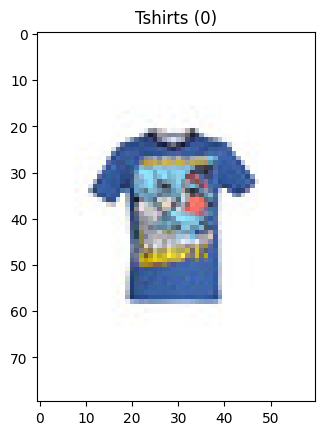

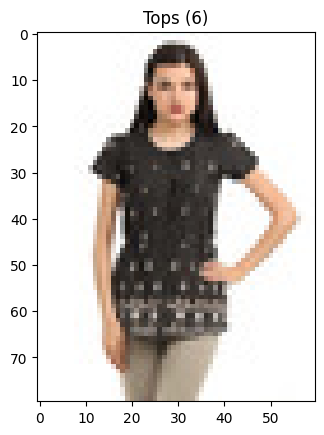

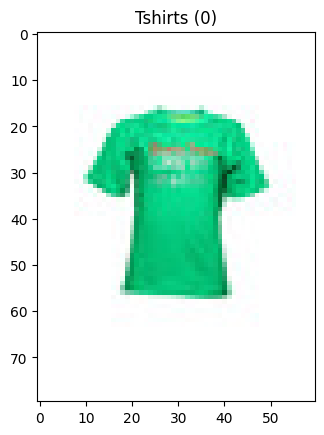

In [6]:
np.random.seed(42)
random_indices = np.random.choice(len(dataset),3)

for i in random_indices:
    img, label = dataset[i]
    plt.title(dataset.df.iloc[i]["articleTypeName"]+f" ({label.item()})")
    plt.imshow(img)
    plt.show()

## Loading different datasets

In [27]:
train_transform = transforms.Compose([
    transforms.Resize((80, 60)),       # <-- make every image 80×60
    transforms.RandomHorizontalFlip(0.5),       # simple data‐augmentation
    transforms.RandomRotation(15),              # small rotations
    transforms.ToTensor(),                      # PIL → Tensor
    transforms.Normalize(                       # ImageNet‐style normalization
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    ),
])

test_transform = transforms.Compose([
    transforms.Resize((80, 60)),       # <-- make every image 80×60
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    ),
])

train_dataset = FashionDataset("dataset/train.csv",img_dir,transform=train_transform)
main_test_dataset =  FashionDataset("dataset/main_test.csv",img_dir,transform=test_transform)
new_test_dataset =  FashionDataset("dataset/new_test.csv",img_dir,transform=test_transform)
main_support_dataset =  FashionDataset("dataset/main_support.csv",img_dir,transform=test_transform)
new_support_dataset =  FashionDataset("dataset/new_support.csv",img_dir,transform=test_transform)
merged_test_dataset =  FashionDataset("dataset/merged_test.csv",img_dir,transform=test_transform) # merged corresponds to main+new
merged_support_dataset =  FashionDataset("dataset/merged_support.csv",img_dir,transform=test_transform)

# datasets with categories
main_test_dataset_cat =  FashionDataset("dataset/main_test.csv",img_dir,column_class="categoryId",transform=test_transform)
main_support_dataset_cat =  FashionDataset("dataset/main_support.csv",img_dir,column_class="categoryId",transform=test_transform)


label_id_to_label_name = {i: train_dataset.df[train_dataset.df["articleTypeId"]==i]["articleTypeName"].iloc[0] for i in range(39)} 
label_id_to_label_name.update({i: new_test_dataset.df[new_test_dataset.df["articleTypeId"]==i]["articleTypeName"].iloc[0] for i in range(39,39+30)})

## Task 1

In [21]:
# your solution
# train dataset: train_dataset
# test datset: main_test_dataset

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F

sequential_basic = nn.Sequential(
    # block 1
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2),              # 224 → 112

    # block 2
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2),              # 112 → 56

    # block 3
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2),              # 56 → 28

    # block 4
    nn.Conv2d(128, 256, kernel_size=3, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(inplace=True),
    nn.AdaptiveAvgPool2d(1)    # 256×1×1
)

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

train_transform = transforms.Compose([
    # transforms.Resize((224,224)),               # bring all images to same size
    transforms.RandomHorizontalFlip(0.5),       # simple data‐augmentation
    transforms.RandomRotation(15),              # small rotations
    transforms.ToTensor(),                      # PIL → Tensor
    transforms.Normalize(                       # ImageNet‐style normalization
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    ),
])

test_transform = transforms.Compose([
    # transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    ),
])


train_dataset = FashionDataset("data/train.csv",img_dir,transform=train_transform)
main_test_dataset =  FashionDataset("data/main_test.csv",img_dir,transform=test_transform)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=4)
test_loader  = DataLoader(main_test_dataset,  batch_size=batch_size, shuffle=False, num_workers=4)

In [10]:
class SimpleCNN(nn.Module):
    def __init__(self, sequential, num_classes=39):
        super(SimpleCNN, self).__init__()
        self.features = sequential

        # classifier head
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(sequential=sequential_basic, num_classes=39).to(device)
nr_epochs = 20
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, factor=0.5)

# train_loader / test_loader as before
for epoch in range(1, nr_epochs + 1):
    print(epoch)
    # --- training ---
    model.train()
    total_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        logits = model(imgs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * imgs.size(0)
    avg_loss = total_loss / len(train_loader.dataset)

    # --- evaluation ---
    from sklearn.metrics import accuracy_score, balanced_accuracy_score
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.to(device)
            logits = model(imgs)
            preds = logits.argmax(dim=1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.numpy())
    acc  = accuracy_score(all_labels, all_preds)
    bacc = balanced_accuracy_score(all_labels, all_preds)

    scheduler.step(1 - bacc)
    print(f"Epoch {epoch:2d}: loss {avg_loss:.4f} | acc {acc*100:5.2f}% | bal_acc {bacc*100:5.2f}%")


1


## Task 2

In [7]:
# your solution
# train dataset: train_dataset
# test and support dataset: see scenarios table

https://chatgpt.com/share/680f8bee-fd38-8013-bfc9-4bc3d82f4123

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import BatchSampler
import numpy as np
from tqdm import tqdm
from itertools import combinations
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)


class EmbeddingNet(nn.Module):
    def __init__(self, sequential, embedding_size=100):
        """CNN Builder."""
        super(EmbeddingNet, self).__init__()
        self.feature_extracting = sequential
        self.fc = nn.Linear(256, embedding_size)

    def forward(self, x):
        """Perform forward."""
        # conv layers
        x = self.feature_extracting(x)  # [B,256,1,1]
        x = x.view(x.size(0), -1)       # [B,256]
        x = self.fc(x)                  # [B,emb_dim]
        return x
    
    def get_embedding(self, x):
        return self.forward(x)

In [65]:
def plot_losses(train_losses, val_losses):    
    # Create an “epoch” axis (1, 2, 3, …)
    epochs = range(1, len(train_losses) + 1)

    # Plot both curves
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_losses,   marker='o', label='Train Loss')
    plt.plot(epochs, val_losses,     marker='s', label='Validation Loss')

    # Labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()


class Trainer():
    def __init__(self,
                 model_name: int,
                 model: torch.nn.Module,
                 device: torch.device,
                 criterion: torch.nn.Module,
                 validation_criterion: torch.nn.Module,
                 optimizer: torch.optim.Optimizer,
                 training_DataLoader: torch.utils.data.Dataset,
                 validation_DataLoader: torch.utils.data.Dataset ,
                 epochs: int
                 ):
        
        self.model_name = model_name
        self.model = model
        self.criterion = criterion
        self.val_criterion = validation_criterion
        self.optimizer = optimizer
        self.training_DataLoader = training_DataLoader
        self.validation_DataLoader = validation_DataLoader
        self.device = device
        self.epochs = epochs
        self.best_val_loss = float('inf')  # track best val loss to save best model

    def run_trainer(self):
        mean_train_losses = []
        mean_val_losses = []
        for epoch in range(self.epochs):
            print(f"Epoch {epoch+1}/{self.epochs}")
            self.model.train()
            train_losses = []
            
            for x, y in tqdm(self.training_DataLoader, 
                            desc="Training batches", 
                            leave=False,
                            total=len(self.training_DataLoader)):
                x, y = x.to(self.device), y.to(self.device)
                self.optimizer.zero_grad()
                out = self.model(x)
                loss = self.criterion(out, y)
                loss.backward()
                self.optimizer.step()
                train_losses.append(loss.item())
            
            mean_train_losses.append(np.mean(train_losses))

            self.model.eval()
            valid_losses = []
            for x, y in tqdm(self.validation_DataLoader, 
                            desc="Validation batches", 
                            leave=False,
                            total=len(self.validation_DataLoader)):
                x, y = x.to(self.device), y.to(self.device)
                with torch.no_grad():
                    out = self.model(x)
                    valid_losses.append(self.val_criterion (out, y).item())

            print(f"  Train Loss: {np.mean(train_losses):.4f}  |  Val Loss: {np.mean(valid_losses):.4f}")

            # if this is the best model so far, we want to save it
            val_loss = np.mean(valid_losses)
            mean_val_losses.append(val_loss)
            print(f"val loss {val_loss:.4f}")
            if val_loss < self.best_val_loss:
                self.best_val_loss = val_loss
                torch.save(self.model.state_dict(), f"best_model_{self.model_name}_best_val.pt")
                print(f"-> New best model saved (val loss {val_loss:.4f})")

        torch.save(self.model.state_dict(), f"best_model_{self.model_name}_final.pt")
        print(f"-> Newest model saved (val loss {val_loss:.4f})")
        plot_losses(mean_train_losses, mean_val_losses)


class BalancedBatchSampler(BatchSampler):
    """
    Returns batches of size n_classes * n_samples
    """

    def __init__(self, labels, n_classes, n_samples, base_indices=None):
        labels = np.array(labels)
        if base_indices is not None:
            base_indices = np.array(base_indices)
        else:
            base_indices = np.arange(len(labels))

        # only keep those indices & labels
        self.base_indices = base_indices
        self.labels = labels[base_indices]       # shape = (n_dataset,)
        self.n_classes  = n_classes
        self.n_samples  = n_samples
        self.n_dataset  = len(base_indices)
        self.batch_size = n_classes * n_samples

        # build label→bucket mapping on reduced labels
        self.labels_set = list(set(self.labels))
        self.label_to_indices = {
            lbl: np.where(self.labels == lbl)[0].tolist()
            for lbl in self.labels_set
        }
        for lbl in self.labels_set:
            np.random.shuffle(self.label_to_indices[lbl])
        self.used_label_indices_count = {lbl: 0 for lbl in self.labels_set}

    def __iter__(self):
        self.count = 0
        while self.count + self.batch_size <= self.n_dataset:
            classes = np.random.choice(self.labels_set, self.n_classes, replace=False)
            indices_of_batch = []
            for cls in classes:
                start = self.used_label_indices_count[cls]
                end   = start + self.n_samples
                bucket = self.label_to_indices[cls]

                # if we’re about to overflow this class’s bucket, reshuffle & reset
                if end > len(bucket):
                    np.random.shuffle(bucket)
                    start = 0
                    end = self.n_samples

                indices_of_batch.extend(bucket[start:end])
                self.used_label_indices_count[cls] = end
                
            yield indices_of_batch
            self.count += self.batch_size

    def __len__(self):
        return self.n_dataset // self.batch_size
    

class TripletLoss(nn.Module):
    """
    Triplets loss
    Takes a batch of embeddings and corresponding labels.
    Triplets are generated using triplet_selector object that take embeddings and targets and return indices of
    triplets
    """
    def __init__(self, margin, triplet_selector):
        super(TripletLoss, self).__init__()
        self.margin = margin
        self.triplet_selector = triplet_selector

    def forward(self, embeddings, target):

        triplets = self.triplet_selector.get_triplets(embeddings, target)

        if embeddings.is_cuda:
            triplets = triplets.cuda()
            
        anchor_idx= triplets[:, 0]  
        positive_idx= triplets[:, 1]  
        negative_idx= triplets[:, 2]  
            
        # gather embeddings
        anc = embeddings[anchor_idx]
        pos = embeddings[positive_idx]
        neg = embeddings[negative_idx]

        # compute pairwise distances
        d_pos = F.pairwise_distance(anc, pos, p=2)   # ||f(a)-f(p)||
        d_neg = F.pairwise_distance(anc, neg, p=2)   # ||f(a)-f(n)||

        # triplet hinge loss: max(0, d_pos - d_neg + margin)
        losses = F.relu(d_pos - d_neg + self.margin)

        # return the mean over the batch of triplets
        return losses.mean()

### Getting informed negatives for the triplets

In [66]:
def pdist(vectors):
    distance_matrix = -2 * vectors.mm(torch.t(vectors)) + vectors.pow(2).sum(dim=1).view(1, -1) + vectors.pow(2).sum(
        dim=1).view(-1, 1)
    return distance_matrix


class Informative_Negative_TripletSelector():

    def __init__(self, margin):
        super(Informative_Negative_TripletSelector, self).__init__()
        self.margin = margin
  
    def get_triplets(self, embeddings, labels):
        
        if torch.cuda.is_available()==False:
            embeddings = embeddings.cpu()
        distance_matrix = pdist(embeddings)
        distance_matrix = distance_matrix.cpu()

        labels = labels.cpu().data.numpy()
        triplets = []

        for label in set(labels):
            label_mask = (labels == label)
            label_indices = np.where(label_mask)[0]
            if len(label_indices) < 2:
                continue
            negative_indices = np.where(np.logical_not(label_mask))[0]
            anchor_positives = list(combinations(label_indices, 2))  # All anchor-positive pairs
            anchor_positives = np.array(anchor_positives)

            # Randomly choose one negative example in the mined informative examples (semihard or hard negative samples) such that the triplets formed is semihard or hard triplet.
            
            for a, p in anchor_positives:
                # distance between anchor and positive
                d_ap = distance_matrix[a, p]

                # all distances between anchor and negatives
                d_an = distance_matrix[a, negative_indices]

                # Hard negatives:    d(a,n) < d(a,p)
                hard_mask = np.where(d_an < d_ap)[0]
                # Semihard negatives: d(a,p) ≤ d(a,n) < d(a,p) + margin
                semi_mask = np.where((d_an >= d_ap) & (d_an < d_ap + self.margin))[0]

                # union of both sets
                candidates = np.concatenate([hard_mask, semi_mask])
                if len(candidates) == 0:
                    continue

                # pick one negative at random
                neg_rel = np.random.choice(candidates)
                n = negative_indices[neg_rel]

                triplets.append([a, p, n])

        triplets = np.array(triplets)
        
        return torch.LongTensor(triplets)
    

class RandomTripletSelector():
    """
    Select random negative example for each positive pair to create triplets.
    
    This class is used for the validation loss computation this way we get a more trustworthy insight into
    the validation loss at that epoch. Using challenging samples for the validation loss will always overestimate
    the validation loss. 
    """

    def __init__(self):
        super(RandomTripletSelector, self).__init__()

    def get_triplets(self, embeddings, labels):
        labels = labels.cpu().data.numpy()
        triplets = []
        for label in set(labels):
            label_mask = (labels == label)
            label_indices = np.where(label_mask)[0]
            if len(label_indices) < 2:
                continue
            negative_indices = np.where(np.logical_not(label_mask))[0]
            anchor_positives = list(combinations(label_indices, 2))  # All anchor-positive pairs

            # random choose one negative example for each positive pair
            temp_triplets = [[anchor_positive[0], anchor_positive[1], np.random.choice(negative_indices)] for anchor_positive in anchor_positives]
            triplets += temp_triplets

        return torch.LongTensor(np.array(triplets))

### Data preparation

In [67]:
# train_transform = transforms.Compose([
#     transforms.Resize((80, 60)),       # <-- make every image 80×60
#     # transforms.Resize((224,224)),               # bring all images to same size
#     transforms.RandomHorizontalFlip(0.5),       # simple data‐augmentation
#     transforms.RandomRotation(15),              # small rotations
#     transforms.ToTensor(),                      # PIL → Tensor
#     transforms.Normalize(                       # ImageNet‐style normalization
#         mean=[0.485, 0.456, 0.406],
#         std =[0.229, 0.224, 0.225]
#     ),
# ])

# test_transform = transforms.Compose([
#     transforms.Resize((80, 60)),       # <-- make every image 80×60
#     # transforms.Resize((224,224)),
#     transforms.ToTensor(),
#     transforms.Normalize(
#         mean=[0.485, 0.456, 0.406],
#         std =[0.229, 0.224, 0.225]
#     ),
# ])


# train_dataset = FashionDataset("dataset/train.csv", img_dir, transform=train_transform)

# split training indices into training and validation (80-20)
idxs = np.arange(len(train_dataset))
train_idxs, val_idxs = train_test_split(
    idxs, test_size=0.2, random_state=42, stratify=train_dataset.targets
)

### Model

In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F

sequential_basic = nn.Sequential(
    # block 1
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2),              # 80x60 -> 40x30

    # block 2
    nn.Conv2d(32, 64, kernel_size=3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(inplace=True),
    # nn.MaxPool2d(2),              # 40x30

    # block 3
    nn.Conv2d(64, 128, kernel_size=3, padding=1),
    nn.BatchNorm2d(128),
    nn.ReLU(inplace=True),
    nn.MaxPool2d(2),              # 20 → 15

    # block 4
    nn.Conv2d(128, 256, kernel_size=3, padding=1),
    nn.BatchNorm2d(256),
    nn.ReLU(inplace=True),
    nn.AdaptiveAvgPool2d(1)    # 256×1×1
)

### Running model

In [69]:
len(train_dataset) / 64

561.46875

cuda
Epoch 1/15


Training batches:   0%|          | 0/574 [00:00<?, ?it/s]

  Train Loss: 0.9758  |  Val Loss: 0.1823
val loss 0.1823
-> New best model saved (val loss 0.1823)
Epoch 2/15


  Train Loss: 0.9958  |  Val Loss: 0.1944
val loss 0.1944
Epoch 3/15


  Train Loss: 0.9967  |  Val Loss: 0.1643
val loss 0.1643
-> New best model saved (val loss 0.1643)
Epoch 4/15


  Train Loss: 0.9972  |  Val Loss: 0.1364
val loss 0.1364
-> New best model saved (val loss 0.1364)
Epoch 5/15


  Train Loss: 0.9942  |  Val Loss: 0.1289
val loss 0.1289
-> New best model saved (val loss 0.1289)
Epoch 6/15


  Train Loss: 0.9946  |  Val Loss: 0.1808
val loss 0.1808
Epoch 7/15


  Train Loss: 0.9966  |  Val Loss: 0.1226
val loss 0.1226
-> New best model saved (val loss 0.1226)
Epoch 8/15


  Train Loss: 0.9972  |  Val Loss: 0.1220
val loss 0.1220
-> New best model saved (val loss 0.1220)
Epoch 9/15


  Train Loss: 0.9962  |  Val Loss: 0.1371
val loss 0.1371
Epoch 10/15


  Train Loss: 0.9960  |  Val Loss: 0.1118
val loss 0.1118
-> New best model saved (val loss 0.1118)
Epoch 11/15


  Train Loss: 0.9943  |  Val Loss: 0.1101
val loss 0.1101
-> New best model saved (val loss 0.1101)
Epoch 12/15


  Train Loss: 0.9969  |  Val Loss: 0.1237
val loss 0.1237
Epoch 13/15


  Train Loss: 0.9985  |  Val Loss: 0.1047
val loss 0.1047
-> New best model saved (val loss 0.1047)
Epoch 14/15


  Train Loss: 0.9929  |  Val Loss: 0.0983
val loss 0.0983
-> New best model saved (val loss 0.0983)
Epoch 15/15


  Train Loss: 0.9968  |  Val Loss: 0.0895
val loss 0.0895
-> New best model saved (val loss 0.0895)
-> Newest model saved (val loss 0.0895)


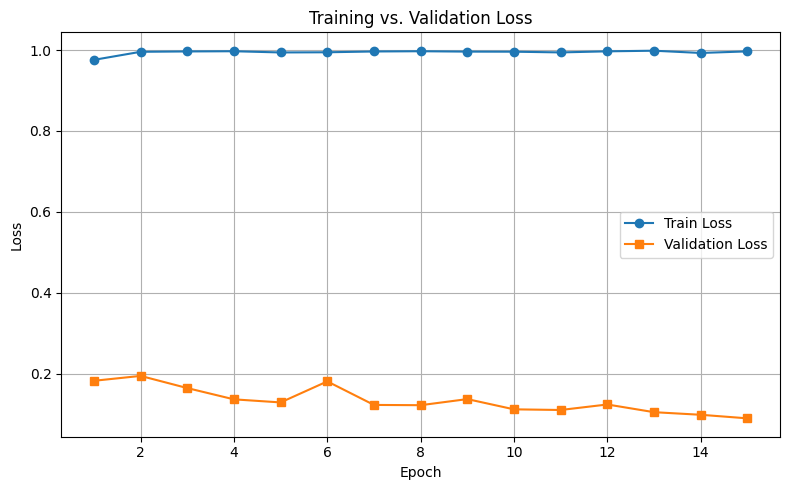

In [72]:
# device
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device=torch.device('cpu')

torch.cuda.empty_cache()
print(device)
    
# data loaders:
train_sampler = BalancedBatchSampler(
    labels=train_dataset.targets,
    n_classes=10,
    n_samples=5,
    base_indices=train_idxs  # can only use the indices in training part of the split
)
# In the dataloader of the training data make sure we actually use 
train_loader = DataLoader(
    train_dataset,
    batch_sampler=train_sampler,
    num_workers=0
)
# In dataloader of validation data we do not have to do balanced samples etc. 
# TODO: Not completely sure if this makes sense?
from torch.utils.data import DataLoader, SubsetRandomSampler
# val_loader = DataLoader(
#     train_dataset,
#     batch_size=64,
#     sampler=SubsetRandomSampler(val_idxs),
#     num_workers=0
# )

## TEST ##

val_sampler = BalancedBatchSampler(
    labels=train_dataset.targets,
    n_classes=10,
    n_samples=5,
    base_indices=val_idxs  # can only use the indices in training part of the split
)
# In the dataloader of the training data make sure we actually use 
val_loader = DataLoader(
    train_dataset,
    batch_sampler=val_sampler,
    num_workers=0
)

## TEST ##

# model
mined_embedding_net = EmbeddingNet(sequential=sequential_basic)
mined_model = mined_embedding_net.to(device)

# margin value
margin=1

# criterion
criterion = TripletLoss(margin,  Informative_Negative_TripletSelector(margin))
validation_criterion = TripletLoss(margin,  RandomTripletSelector())

# optimizer
# optimizer = torch.optim.SGD(mined_model.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(mined_model.parameters(), lr=0.001)


# trainer
trainer = Trainer(model_name=1,
                  model=mined_model,
                  device=device,
                  criterion=criterion,
                  validation_criterion=validation_criterion,
                  optimizer=optimizer,
                  training_DataLoader=train_loader,
                  validation_DataLoader=val_loader,
                  epochs=15)

# start training
metrics = trainer.run_trainer()

In [48]:
# Evt validation set ook balanced samplen

In [73]:
# Load model from file

# re-create your model architecture
mined_embedding_net = EmbeddingNet(sequential=sequential_basic)
mined_model = mined_embedding_net.to(device)

# load the weights
mined_model.load_state_dict(torch.load("best_model_1_best_val.pt", map_location=device))

<All keys matched successfully>

In [74]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score


def extract_embeddings(dataloader, model, embedding_size=100):
    """Extract embeddings an labels for a dataset"""
    cuda = torch.cuda.is_available()
    with torch.no_grad():
        model.eval()
        embeddings = np.zeros((len(dataloader.dataset), embedding_size))
        labels = np.zeros(len(dataloader.dataset))
        k = 0
        for images, target in dataloader:
            if cuda:
                images = images.cuda()
            embeddings[k:k+len(images)] = model.get_embedding(images).data.cpu().numpy()
            labels[k:k+len(images)] = target.numpy()
            k += len(images)
    return embeddings, labels


def evaluate_embedding_model(support_dl, test_dl, model, embedding_size=100):
    """give dataloaders and the model"""
    # Find support embeddings and labels:
    # extract_embeddings, labels = extract_embeddings(support_dl, model)

    # Compute prototypes or average embeddings of each class in support data

    # Iterate over the test data
    # Extract embedding for each item
    # Look at which class prototype is closest to the embedding --> classify the test prediction as that class
    # Compare predicted value with the true value # NOTE iterating over the dataloader gives for X, y in loader.
    # This way compute both accuracy and other measures necessary --> probably balanced accuracy

    # Run this function for each of the differen scenarios

    # 1) extract support embeddings & labels
    support_embeddings, support_labels = extract_embeddings(support_dl, model, embedding_size)

    # 2) build class prototypes (mean embedding per class)
    classes = np.unique(support_labels)
    prototypes = {
        cls: support_embeddings[support_labels == cls].mean(axis=0)
        for cls in classes
    }

    # 3) extract all test embeddings & labels
    test_embeddings, test_labels = extract_embeddings(test_dl, model, embedding_size)

    # 4) for each test embedding, find nearest prototype
    preds = []
    for emb in test_embeddings:
        # compute L2 distances to each prototype
        dists = [np.linalg.norm(emb - prototypes[cls]) for cls in classes]
        pred_cls = classes[np.argmin(dists)]
        preds.append(pred_cls)

    # 5) compute metrics
    acc = accuracy_score(test_labels, preds)
    bal_acc = balanced_accuracy_score(test_labels, preds)

    return {"accuracy": acc, "balanced_accuracy": bal_acc}


In [79]:
from torch.utils.data import ConcatDataset

# Scenario 1:
# support_data = train_dataset
# test_data = main_test_dataset

# # Scenario 2:
# support_data = main_support_dataset
# test_data = main_test_dataset

# # Scenario 3:
# support_data = new_support_dataset
# test_data = new_test_dataset

# # Scenario 4:
support_data = ConcatDataset([main_support_dataset, new_support_dataset])
test_data = ConcatDataset([main_test_dataset, new_test_dataset])


support_loader = DataLoader(support_data, batch_size=64, num_workers=0)
test_loader = DataLoader(test_data, batch_size=64, num_workers=0)

results = evaluate_embedding_model(support_dl=support_loader, test_dl=test_loader, model=mined_model)
results

{'accuracy': 0.5706863549357397,
 'balanced_accuracy': np.float64(0.5172437639542317)}

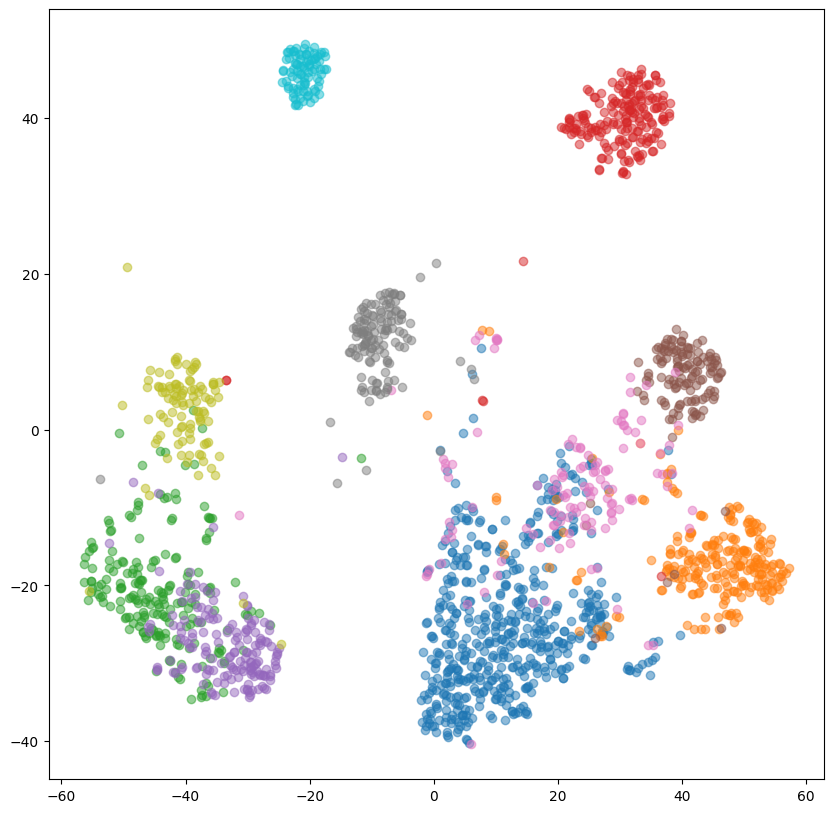

In [80]:
val_loader = DataLoader(
    train_dataset,
    batch_size=64,
    sampler=SubsetRandomSampler(val_idxs),
    num_workers=0
)


val_embeddings, val_labels = extract_embeddings(val_loader, mined_model)


from sklearn.manifold import TSNE


def plot_tsne_embeddings(embeddings, targets, xlim=None, ylim=None):    
    # The first 3000 embeddings and targets
    embeddings= embeddings[:3000]
    targets= targets[:3000]

    # Using Tsne to for dimension reduction 
    tsne = TSNE(n_components=2)
    embeddings = tsne.fit_transform(embeddings)
    
    # Plot
    plt.figure(figsize=(10,10))
    for i in range(10):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    # plt.legend(classes)

# plot_tsne_embeddings(train_embeddings, train_labels)
plot_tsne_embeddings(val_embeddings, val_labels)

Restart your process so no 10 GB of stale memory is “allocated” on your 4 GB card.

Cut batch size → 16 or lower, resize to 128×128.

Empty the cache + enable amp (autocast/GradScaler).

Verify with nvidia-smi that your process now sits under ~3.5 GB.

## Task 3

In [ ]:
# your solution
# test dataset: merged_test_dataset
# support/catalog dataset: support_test_dataset

## Task 4

In [ ]:
# your solution
# datasets: first 10 classes of train_dataset and main_test_dataset